<center>
    <h1>The (almost) all-Python QEpy software</h1>
<center>
<br>
<table>
  <tr>
      <td><p><h1>Pavanello Research Group</h1></p><p><h2>Rutgers University-Newark</h2></p></td>
  </tr>
  <tr>
    <td></td>
  </tr>
</table>

#### Quantum MultiScale School June 18th 2024

# Acknowledgements

<table>
  <tr>
      <td><p></p><p>Alina Umerbekova</p><p>Nicolas Viot</p><p>Xin Chen </p><p>Xuecheng Shao</p><p>Michele Pavanello</p><p>Valeria Rios </p><p>Jessica Martinez</p></td>
  </tr>
</table>

Funding: NSF, DOE, MolSSI, ACS-PRF, Rutgers

<center>
QEpy driver: Python driver class for Quantum ESPRESSO - KS-DFT in Python

<br>
<br>

<center>
    <div class="alert alert-success"> GOALS:</div>
    <div class="alert alert-success">1) What are the optimal number of k-points to use for a given system?</div>
    <div class="alert alert-success">2) What are the optimal values for the kinetic energy cutof for a given system?</div>
    <div class="alert alert-success">3) What are the optimal values for the gaussian spreading for a given system?</div>
</center>

#### Getting started!

- Git clone

<br>
<center>
<h6>git clone https://github.com/Quantum-MultiScale-Template/DFT-Intro</h6>
</center>


- Go to ./DFT-Intro/2024/QEPy/testing in your tunneled Jupyter-Notebook

<br>
<center>
<h6> ./DFT-Intro/2024/QEPy/testing/QEPY-RISE.ipynb</h6>
</center>

- Run this alongside with me! 

In [1]:
from qepy.driver import Driver
from qepy.io import QEInput

In [2]:
from ase.build import bulk
from ase.io import read,write
from ase import Atoms
import py3Dmol

## Build your system

In [3]:
atoms = bulk('Al', 'fcc', a=4.05)
write('Al.xyz',atoms)
v = py3Dmol.view(data=open('./Al.xyz','r').read(), style='sphere')
v.addUnitCell()
v.zoomTo()
v.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [4]:
# atoms.get_cell()

## Build an 'Input' file

In [5]:
qe_options = {
    '&control': {
        'calculation': "'scf'",
        'pseudo_dir': "'./'",
        'outdir': "tmp",
    },
    '&system': {
        'ibrav' : 0,
        'degauss': 0.005,
        'ecutwfc': 30,
        'nat': 1,
        'ntyp': 1,
        'occupations': "'smearing'",
    },
    'atomic_positions crystal': ['Al    0.0  0.0  0.0'],
    'atomic_species': ['Al  26.98 Al.pbe-nl-kjpaw_psl.1.0.0.UPF'],
    'k_points automatic': ['10 10 10 1 1 1'],
    'cell_parameters angstrom':[
        '0.     2.025  2.025',
        '2.025  0.     2.025',
        '2.025  2.025  0.   '],
}

## Download the Pseupotentials

In [6]:
additional_files = ['http://pseudopotentials.quantum-espresso.org/upf_files/Al.pbe-nl-kjpaw_psl.1.0.0.UPF']
from dftpy.formats import download_files
download_files(additional_files)

## Varying the kinetic energy cutoff (Ry) for truncating the basis set for plane waves

In [7]:
import numpy as np
ecutwfcs = np.arange(10, 40, 5)
energies = []
for ecutwfc in ecutwfcs:
    qe_options['&system']['ecutwfc'] = ecutwfc
    #
    driver = Driver(qe_options=qe_options, logfile=True)
    ene = driver.scf()
    energies.append(ene)
    print(ecutwfc, ene)
    driver.stop()

10 -39.49905005721003
15 -39.500836712625215
20 -39.50192013207568
25 -39.50253060756487
30 -39.50272673370976
35 -39.50283024220251


Text(0, 0.5, 'Total Energy (Ry)')

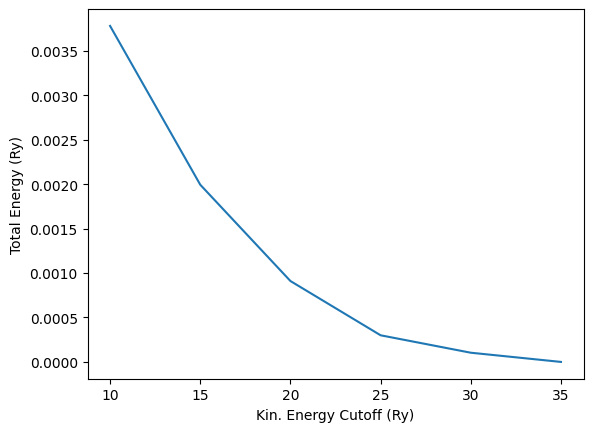

In [8]:
import matplotlib.pyplot as plt
energies=np.asarray(energies)
plt.plot(ecutwfcs, energies-energies[-1])
plt.xlabel('Kin. Energy Cutoff (Ry)')
plt.ylabel('Total Energy (Ry)')

# Challenge 1

1. Plot energy vs  Kin. Energy Cutoff for bulk Al (bcc) with QEpy

## Varying the k-points

In [9]:
# kps = np.arange(2, 12, 2)
kps = np.arange(1, 11, 2)
energies = []
for kp in kps:
#     qe_options['k_points automatic'] = [f'{kp} {kp} {kp} 1 1 1']
    qe_options['k_points automatic'] = [f'{kp} {kp} {kp} 0 0 0']
    #
    driver = Driver(qe_options=qe_options, logfile=True)
#     print(driver.get_ibz_k_points()[0:1])
    ene = driver.scf()
    energies.append(ene)
    print(kp, ene)
    driver.stop()

1 -39.24296622012197
3 -39.46014909158279
5 -39.49832839031548
7 -39.50597459248445
9 -39.50044171917424


Text(0, 0.5, 'Total Energy (Ry)')

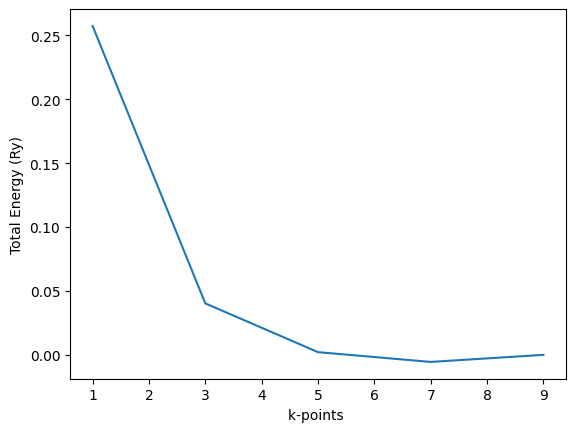

In [10]:
energies=np.asarray(energies)
plt.plot(kps, energies-energies[-1])
plt.xlabel('k-points ')
plt.ylabel('Total Energy (Ry)')

# Challenge 2

1. Plot energy vs  number of k-points for bulk Al (bcc) with QEpy

## Varying the gaussian spreading (Ry) for smoothing the band occupancy

#### Setting degauss using qe_options

In [11]:
%%time
degs= [1E-1, 5E-2, 1E-2, 5E-3, 1E-3]
energies = []
for degauss in degs:
    qe_options['&system']['degauss'] = degauss
    #
    driver = Driver(qe_options=qe_options, logfile=True)
    ene = driver.scf()
    print('degauss',degauss, ene, driver.get_scf_steps())
    energies.append(ene)
    driver.stop()

degauss 0.1 -39.51616027366381 4
degauss 0.05 -39.50488622078137 3
degauss 0.01 -39.50062116733474 4
degauss 0.005 -39.50044172173984 4
degauss 0.001 -39.50031169004518 4
CPU times: user 6.19 s, sys: 986 ms, total: 7.18 s
Wall time: 7.4 s


Text(0, 0.5, 'Total Energy (Ry)')

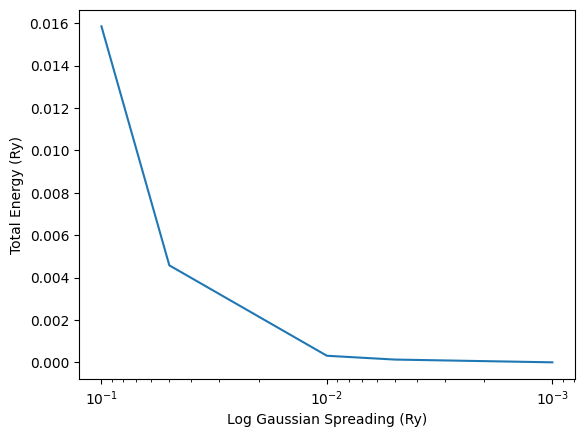

In [12]:
energies=np.asarray(energies)
fig, ax = plt.subplots()
ax.plot(degs, np.abs(energies-energies[-1]))
ax.set_xscale('log')
ax.invert_xaxis()
plt.xlabel('Log Gaussian Spreading (Ry)')
plt.ylabel('Total Energy (Ry)')

#### Setting degauss using module of QE

In [13]:
qe_options['&system']['degauss'] = 0.1
driver = Driver(qe_options=qe_options, logfile=True)

In [14]:
%%time
degs= [1E-1, 5E-2, 1E-2, 5E-3, 1E-3]
energies2 = []
for degauss in degs:
    #
    driver.qepy_pw.klist.set_degauss(degauss)
    ene = driver.electrons()
    print('degauss',degauss, ene, driver.get_scf_steps())
    energies2.append(ene)

degauss 0.1 -39.51616027319912 4
degauss 0.05 -39.50488750899185 1
degauss 0.01 -39.500621177259 2
degauss 0.005 -39.50044173301069 1
degauss 0.001 -39.500311699260344 1
CPU times: user 2.6 s, sys: 347 ms, total: 2.95 s
Wall time: 3 s


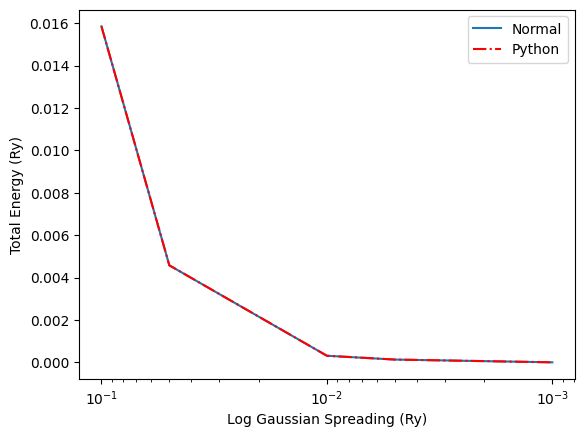

In [15]:
energies=np.asarray(energies)
energies2=np.asarray(energies2)
fig, ax = plt.subplots()
ax.plot(degs, np.abs(energies-energies[-1]), label='Normal')
ax.plot(degs, np.abs(energies2-energies2[-1]), 'r-.', label='Python')
ax.set_xscale('log')
ax.invert_xaxis()
plt.xlabel('Log Gaussian Spreading (Ry)')
plt.ylabel('Total Energy (Ry)')
ax.legend()

# Challenge 3

1. Plot energy vs log of gaussian spreading for bulk Al (bcc) with either QEPy or calling QE modules directly.